1b. Build a logistic regression model  
Using the dataset “student_data.csv,” write code to (1) create a visualization of the data, (2) fit a model using logistic regression, (3) output model coefficients and performance metrics such as accuracy and AUC and ROC 
1b Ans:- Please find the below code block for creation of logistic regression model;

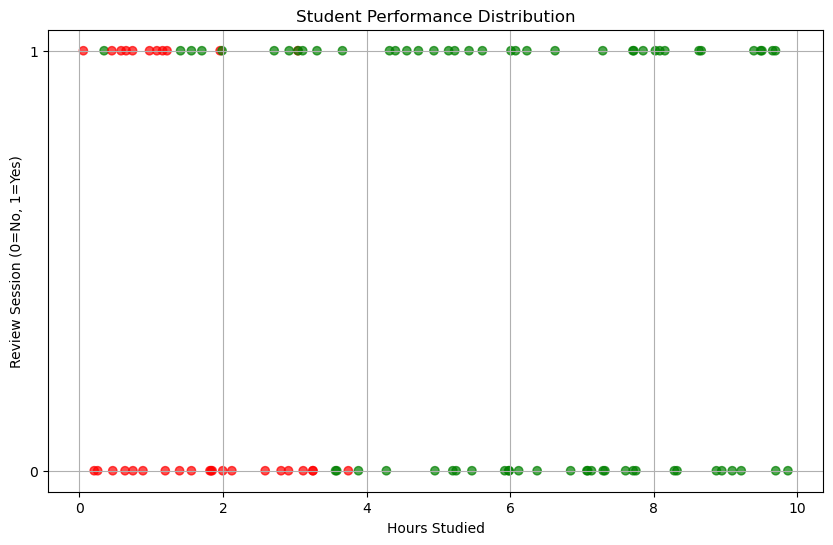

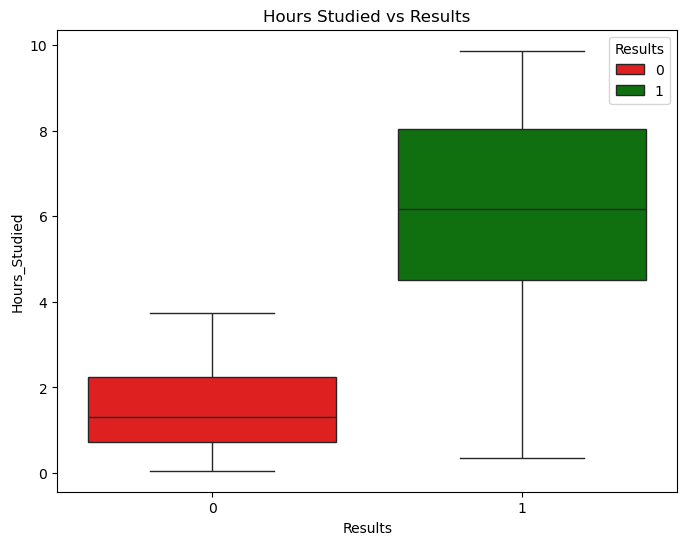


 Confusion Matrix:
 [[30  2]
 [ 5 63]]


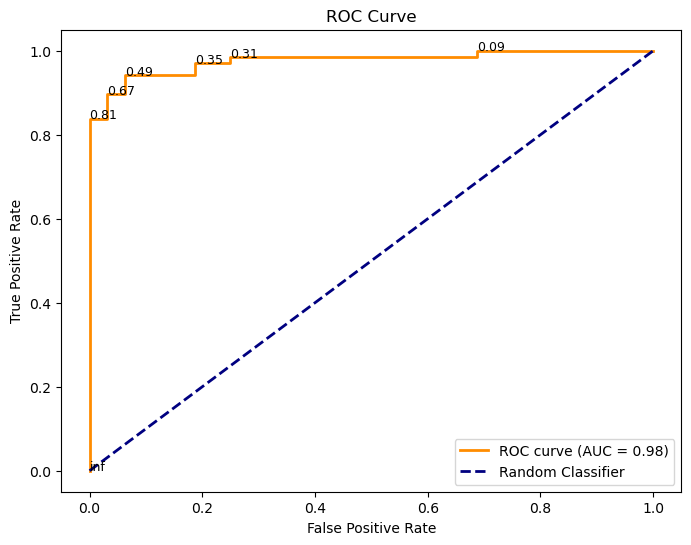

Model Coefficients:
          Feature  Coefficient
0   Hours_Studied     1.365420
1  Review_Session     1.877976
Intercept : -4.6137

Model Accuracy: 93.00%

Accuracy: 0.93
AUC Score: 0.98


In [73]:
#Question 1b - Solution code
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix

# Load data
file_path = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/03102025_CW/student_data.csv"
df = pd.read_csv(file_path)

# 1. Visualization of the Data 
plt.figure(figsize=(10, 6))
colors = ['red' if result == 0 else 'green' for result in df['Results']]
plt.scatter(df['Hours_Studied'], df['Review_Session'], c=colors, alpha=0.7)
plt.title('Student Performance Distribution')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session (0=No, 1=Yes)')
plt.yticks([0, 1])
plt.grid(True)
plt.savefig('student_data_visualization_Scatterplot.png')
plt.show()

plt.figure(figsize=(8, 6))
#colors = ['red' if result == 0 else 'green' for result in df['Results']]
sns.boxplot(data=df, x='Results', y='Hours_Studied', hue='Results', palette={0: 'red', 1: 'green'})
plt.title('Hours Studied vs Results')
plt.savefig('student_data_visualization_Boxplot.png')
plt.show()

# 2. Logistic Regression Model 
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

model = LogisticRegression()
model.fit(X, y)  

# 3. Model Evaluation 
# Coefficients
coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})


y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

# Metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_proba)

cm = confusion_matrix(y, y_pred)
print("\n Confusion Matrix:\n", cm)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
for i in range(0, len(fpr), int(len(fpr)/5)):
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=9, color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('Roc_curve_LogisticRegression.png')
plt.show()

# Output results
print("Model Coefficients:")
print(coef)
print("Intercept : {:.4f}".format(model.intercept_[0]))
accuracy = accuracy_score(y, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print(f"\nAccuracy: {accuracy:.2f}")
print(f"AUC Score: {auc:.2f}")

2. Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-
fold cross-validation.
2 Ans:- Please find the below code for SVM model creation;

SVM with Linear Kernel
Accuracy: 0.9200
AUC: 0.9821

Confusion Matrix:
                 Predicted Fail (0)  Predicted Pass (1)
Actual Fail (0)                  31                   1
Actual Pass (1)                   7                  61

 Linear Kernel SVM Accuracy: 92.00%

 Confusion Matrix (Linear Kernel):
 [[31  1]
 [ 7 61]]

 Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.98      0.90      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.92      0.92       100


SVM with RBF Kernel
Best Gamma: 0.1
Accuracy: 0.9300
AUC: 0.9738

Confusion Matrix:
                 Predicted Fail (0)  Predicted Pass (1)
Actual Fail (0)                  30                   2
Actual Pass (1)                   5                  63

 RBF Kernel SVM Accuracy : 93.00%

 Confusion

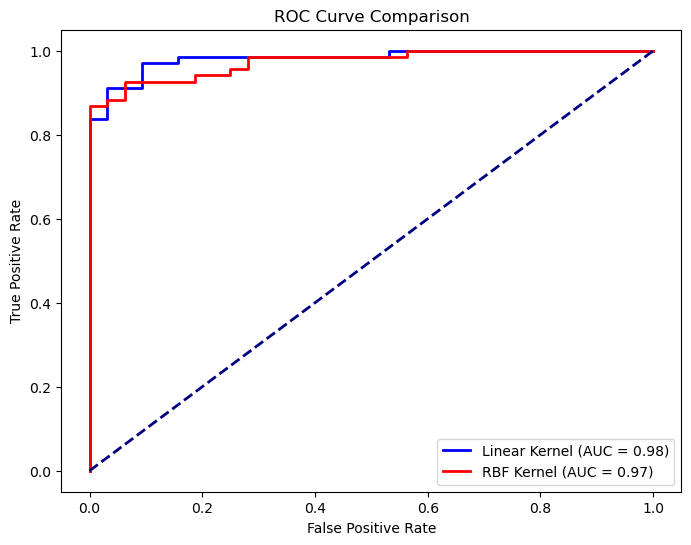

In [47]:
#Question 2 - Solution Code
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

# Load data 
file_path = "https://raw.githubusercontent.com/UB01976/is7332025/refs/heads/main/data-mining-project-repo/03102025_CW/student_data.csv"
df = pd.read_csv(file_path)

# Prepare data
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# 1. SVM with Linear Kernel
svm_linear = SVC(kernel='linear', probability=True) 
svm_linear.fit(X, y)

# Predictions and metrics for linear kernel
y_pred_linear = svm_linear.predict(X)
y_proba_linear = svm_linear.predict_proba(X)[:, 1]

accuracy_linear = accuracy_score(y, y_pred_linear)
auc_linear = roc_auc_score(y, y_proba_linear)
conf_matrix_linear = confusion_matrix(y, y_pred_linear)

print("SVM with Linear Kernel")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"AUC: {auc_linear:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_linear,
                   index=['Actual Fail (0)', 'Actual Pass (1)'],
                   columns=['Predicted Fail (0)', 'Predicted Pass (1)']))
print("\n Linear Kernel SVM Accuracy: {:.2f}%".format(accuracy_linear * 100))
print("\n Confusion Matrix (Linear Kernel):\n", confusion_matrix(y, y_pred_linear))
print("\n Classification Report (Linear Kernel):\n", classification_report(y, y_pred_linear))

# 2. SVM with RBF Kernel and Grid Search
param_grid = {'gamma': [ 0.01, 0.1, 1, 10]}
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

grid_search = GridSearchCV(SVC(kernel='rbf', probability=True),  
                           param_grid, cv=kf, scoring='roc_auc') 
grid_search.fit(X, y)


best_svm_rbf = grid_search.best_estimator_
best_gamma = grid_search.best_params_['gamma']


y_pred_rbf = best_svm_rbf.predict(X)
y_proba_rbf = best_svm_rbf.predict_proba(X)[:, 1]

accuracy_rbf = accuracy_score(y, y_pred_rbf)
auc_rbf = roc_auc_score(y, y_proba_rbf)
conf_matrix_rbf = confusion_matrix(y, y_pred_rbf)

print("\nSVM with RBF Kernel")
print(f"Best Gamma: {best_gamma}")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"AUC: {auc_rbf:.4f}")
print("\nConfusion Matrix:")
print(pd.DataFrame(conf_matrix_rbf,
                   index=['Actual Fail (0)', 'Actual Pass (1)'],
                   columns=['Predicted Fail (0)', 'Predicted Pass (1)']))
print("\n RBF Kernel SVM Accuracy : {:.2f}%".format(accuracy_rbf * 100))
print("\n Confusion Matrix (RBF Kernel):\n", confusion_matrix(y, y_pred_rbf))

fpr_linear, tpr_linear, _ = roc_curve(y, y_proba_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y, y_proba_rbf)


print("\n Best Parameters (RBF Kernel):", grid_search.best_params_)
print(" Best Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))
print("\n Classification Report (RBF Kernel):\n", classification_report(y, y_pred_rbf))


plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2,
         label=f'Linear Kernel (AUC = {auc_linear:.2f})')
plt.plot(fpr_rbf, tpr_rbf, color='red', lw=2,
         label=f'RBF Kernel (AUC = {auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.savefig('Roc_curve_svm.png') 
plt.show()